In [1]:
# set work dir
import os
os.chdir("../")

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
def drawPlot(grids, n, d, e):
    regrets, elapses = getRow(grids, n, d, e)
    # loss
    plt.figure(figsize=(12, 6))
    plt.plot(regrets["lr"], marker='o', markersize=5, color="y", alpha=0.7)
    plt.plot(regrets["rf"], marker='o', markersize=5, color="c", alpha=0.7)
    plt.plot(regrets["spo"], marker='o', markersize=5, color="g", alpha=0.7)
    plt.plot(regrets["bb"], marker='o', markersize=5, color="b", alpha=0.7)
    plt.xticks(ticks=[0,1,2], labels=["{}x{}".format(g[0], g[1]) for g in grids], fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('Graph Size', fontsize=16)
    plt.ylabel('Regret Loss', fontsize=16)
    plt.title("Regret Loss vs. Graph Size,\nTraining Set Size = {}".format(n), fontsize=16)
    plt.legend(["2-stage LR", "2-stage RF", "SPO+","Black-Box"], fontsize=14)
    plt.show()
    # time
    plt.figure(figsize=(12, 6))
    plt.plot(elapses["lr"], marker='o', markersize=5, color="y", alpha=0.7)
    plt.plot(elapses["rf"], marker='o', markersize=5, color="c", alpha=0.7)
    plt.plot(elapses["spo"], marker='o', markersize=5, color="g", alpha=0.7)
    plt.plot(elapses["bb"], marker='o', markersize=5, color="b", alpha=0.7)
    plt.xticks(ticks=[0,1,2], labels=["{}x{}".format(g[0], g[1]) for g in grids], fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel("Graph Size", fontsize=16)
    plt.ylabel("Elapsed Time", fontsize=16)
    plt.title("Elapsed Time vs. Graph Size,\nTraining Set Size = {}".format(n), fontsize=16)
    plt.legend(["2-stage LR", "2-stage RF", "SPO+","Black-Box"], fontsize=14)
    plt.show()

In [4]:
def getRow(grids, n, d, e):
    regrets = {"lr":[], "rf":[], "spo":[], "bb":[]}
    elapses = {"lr":[], "rf":[], "spo":[], "bb":[]}
    for g in grids:
        l, t = getData(g, n, d, e)
        for m in regrets:
            regrets[m].append(l[m])
            elapses[m].append(t[m])
    return regrets, elapses

In [5]:
def getData(grid, n, d, e):
    # dir
    dir_name = "./res/sp/h{}w{}/gurobi".format(grid[0], grid[1])
    file_name = {}
    file_name["lr"] = "n{}p5-d{}-e{}_2s-lr.csv".format(n,d,e)
    file_name["rf"] = "n{}p5-d{}-e{}_2s-rf.csv".format(n,d,e)
    file_name["spo"] = "n{}p5-d{}-e{}_spo_lr_adam0.001_bs32_l10.0l20.0_c8.csv".format(n,d,e)
    file_name["bb"] = "n{}p5-d{}-e{}_bb_lr_adam0.01_bs128_l10.0l20.0_c8-lamb20.csv".format(n,d,e)
    # load data
    regret, elapse = {}, {}
    for m, f in file_name.items():
        df = pd.read_csv(dir_name + "/" + f)
        regret[m] = df["Unamb SPO"].mean()
        elapse[m] = df["Elapsed"].mean()
    return regret, elapse

In [6]:
grids = [(5,5), (10,10), (15,15)]

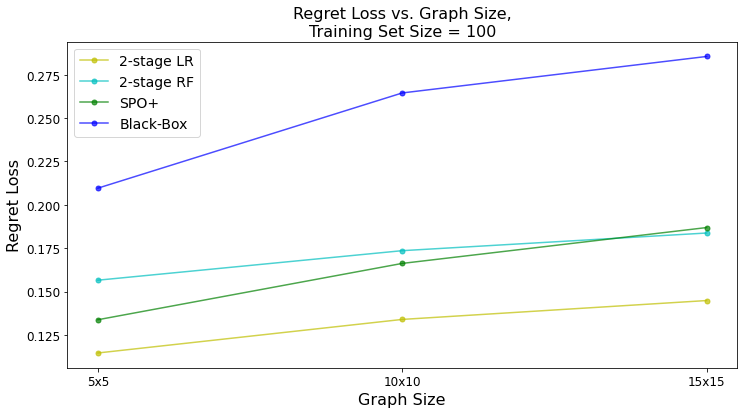

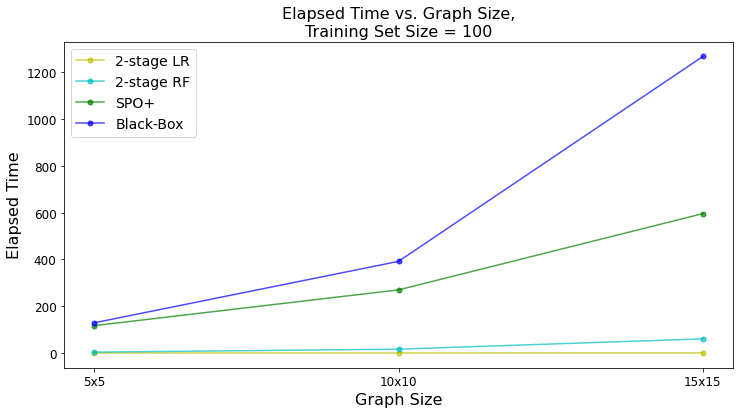

In [7]:
n = 100
d = 2
e = 0.5
drawPlot(grids, n, d, e)

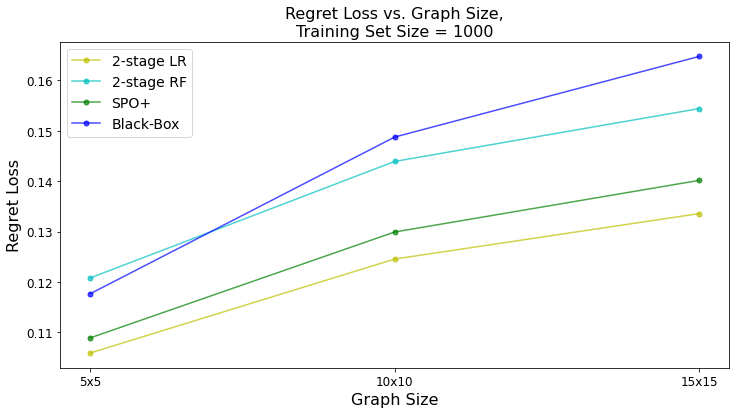

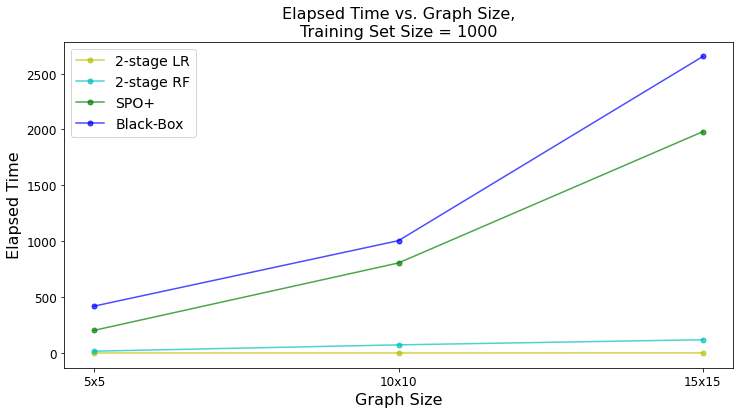

In [8]:
n = 1000
d = 2
e = 0.5
drawPlot(grids, n, d, e)

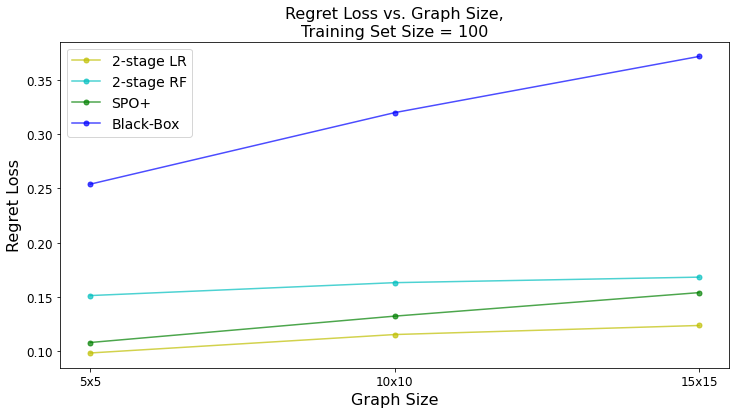

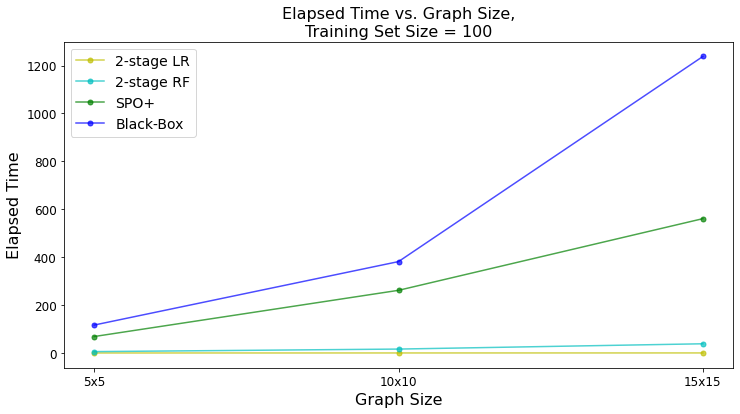

In [9]:
n = 100
d = 4
e = 0.5
drawPlot(grids, n, d, e)

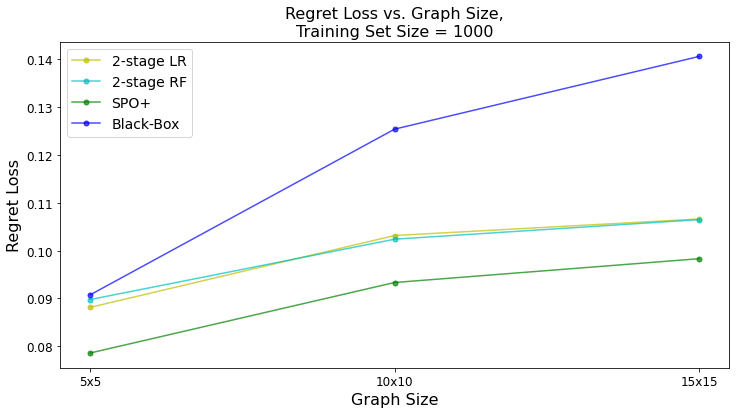

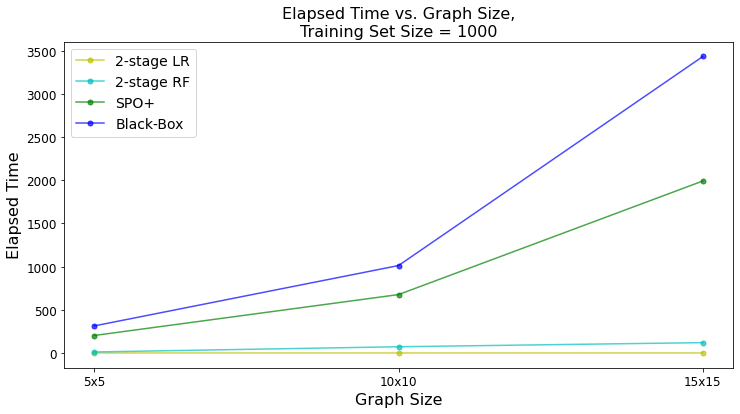

In [10]:
n = 1000
d = 4
e = 0.5
drawPlot(grids, n, d, e)

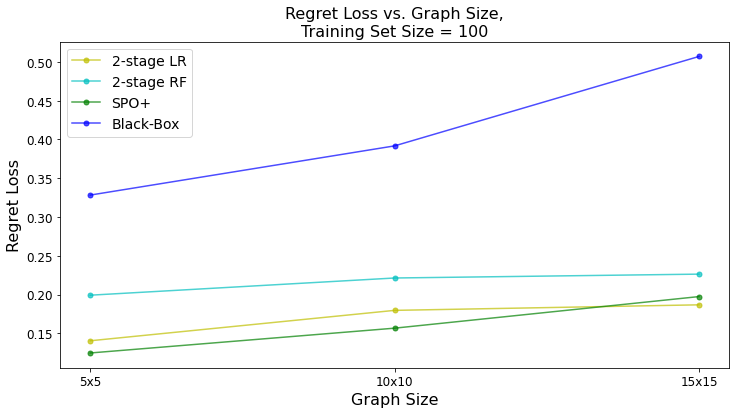

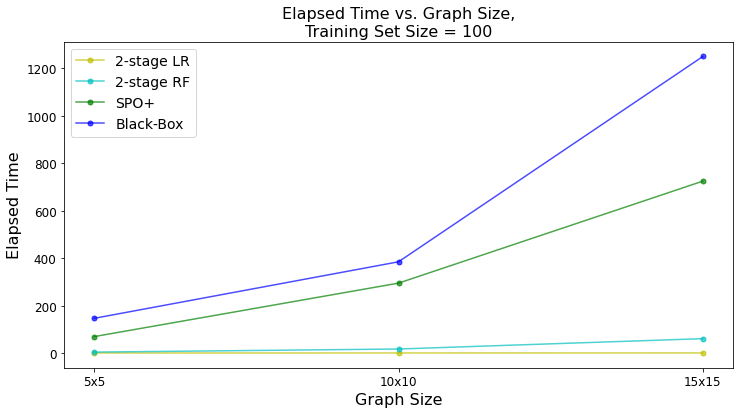

In [11]:
n = 100
d = 6
e = 0.5
drawPlot(grids, n, d, e)

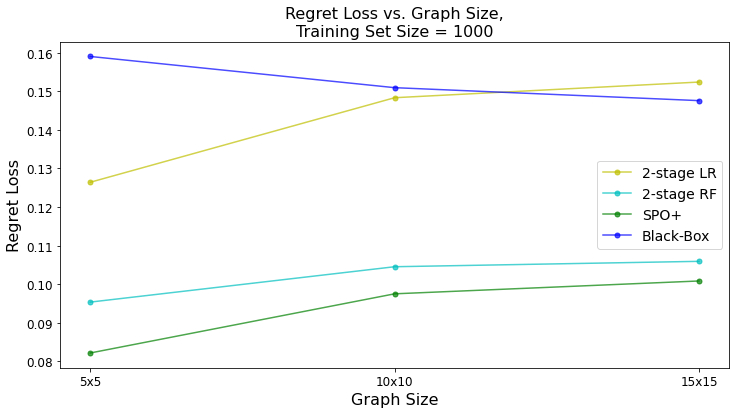

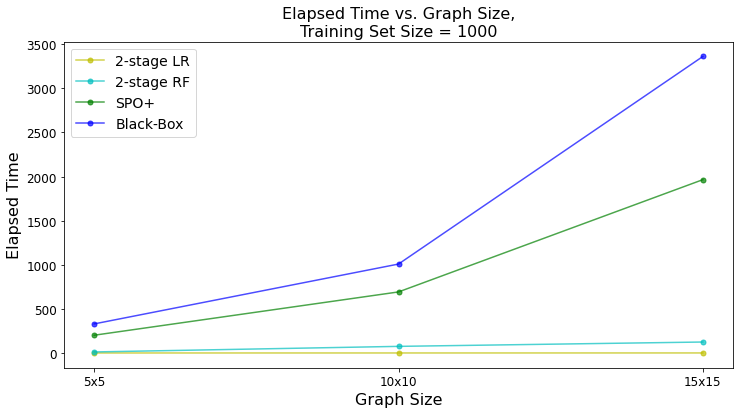

In [12]:
n = 1000
d = 6
e = 0.5
drawPlot(grids, n, d, e)